Katherine Kairis, kak275@pitt.edu, 11/28/2017

NEW CONTINUING

In [1]:
import pickle
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
stopWords = set(stopwords.words('english'))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
"""
Takes a dictionary of conversations from a corpus, and returns a list of bigrams.
"""
def get_bigrams(dictionary):
    bigrams = []
    for file in dictionary:
        for key in dictionary[file]:
            pairs = list(nltk.bigrams(dictionary[file][key]))
            bigrams.extend(pairs)
    return bigrams

'\nTakes a dictionary of conversations from a corpus, and returns a list of bigrams.\n'

In [3]:
"""
Takes a list of bigrams, returns dictionary whose keys are bigrams containing duplicate words (e.g ('i', 'i',), 
'the', 'the') and whose values are the frequencies of each bigram
"""
def repeated_words(bigrams):
    repeated = {}
    for b in bigrams:
        if(b[0] == b[1]):
            if(b not in repeated):
                repeated[b] = 1
            else:
                repeated[b] += 1
    return repeated

"\nTakes a list of bigrams, returns dictionary whose keys are bigrams containing duplicate words (e.g ('i', 'i',), \n'the', 'the') and whose values are the frequencies of each bigram\n"

In [4]:
"""
Takes a dictionary of bigrams whose keys are bigrams containing duplicate words (e.g ('i', 'i',), 
'the', 'the') and whose values are the frequencies of each bigram. Returns the sum of the frequencies for only
bigrams that contain repeated stop words
"""
def repeated_stopwords(bigram_dict):
    count = 0
    for b in bigram_dict.keys():
        if b[0] in stopWords:
            count += bigram_dict[b]
    return count

"\nTakes a dictionary of bigrams whose keys are bigrams containing duplicate words (e.g ('i', 'i',), \n'the', 'the') and whose values are the frequencies of each bigram. Returns the sum of the frequencies for only\nbigrams that contain repeated stop words\n"

In [5]:
"""
Takes a dictionary containing conversations and a user-provided tag. Returns a dictionary who keys are words that are 
associated with the tag, and whose values are the frequencies of each word
"""
def tag_counts(conv_dictionary, tag):
    tags = {}
    for file in conv_dictionary:
        for key in conv_dictionary[file]:
            for pair in conv_dictionary[file][key]:
                if(pair[1] == tag):
                    if(pair not in tags):
                        tags[pair] = 1
                    else:
                        tags[pair] += 1
    return tags

'\nTakes a dictionary containing conversations and a user-provided tag. Returns a dictionary who keys are words that are \nassociated with the tag, and whose values are the frequencies of each word\n'

In [6]:
"""
Takes a list of bigrams and a percentage between 0 and 1. Returns a dictionary whose keys are bigrams and whose values
are the frequencies of the bigrams. The bigrams included in the dictionary are only the ones that occur in the top 
given percent. For example, if the user inputs BNC_bigrams 0.3, the returned dictionary will occur the top 30% of 
bigrams in terms of their frequencies. The BNC has 9378696 bigram occurrences, so the dictionary will contain around 
1875739 entries.
"""

def frequent_bigrams(bigrams, percent):
    freqs = nltk.FreqDist(bigrams)
    most_common = freqs.most_common()
    limit = len(bigrams) * percent
    num_occurrences = 0
    top_bigrams = []
    
    for b in freqs.most_common():
        num_occurrences += b[1]
        if(num_occurrences >= limit):
            return top_bigrams
        top_bigrams.append(b)
    return count_dictionary

'\nTakes a list of bigrams and a percentage between 0 and 1. Returns a dictionary whose keys are bigrams and whose values\nare the frequencies of the bigrams. The bigrams included in the dictionary are only the ones that occur in the top \ngiven percent. For example, if the user inputs BNC_bigrams 0.3, the returned dictionary will occur the top 30% of \nbigrams in terms of their frequencies. The BNC has 9378696 bigram occurrences, so the dictionary will contain around \n1875739 entries.\n'

In [7]:
"""
Takes a conversation dictionary and a list of languages. Returns a dictionary of conversations containing only 
utterances from participants whose L1 is listed in the list of languages.
"""
def speech_by_L1(conversation_dict, lang_list):
    new_dict = {}
    for conversation in conversation_dict.keys():
        utterances = {}
        
        for pair in conversation_dict[conversation]:    
            speaker = pair[1]
            #print(conversation_dict[conversation][pair])

            
            #print(participants[speaker]['L1'][0])
            if(participants[speaker]['L1'][0] in lang_list):
                utterances[pair] = conversation_dict[conversation][pair]
            

        new_dict[conversation] = utterances    

    return new_dict

'\nTakes a conversation dictionary and a list of languages. Returns a dictionary of conversations containing only \nutterances from participants whose L1 is listed in the list of languages.\n'

In [8]:
"""
Takes two lists, a and b, that contain bigrams and their frequencies. e.g. [(('it', "'s"), 68661),
 (('that', "'s"), 45150),
 (('do', "n't"), 42215),] 
Returns a list of bigrams in b that are also in a.
"""
def common_bigrams(list_a, list_b):
    common = []
    list_a = [b[0] for b in list_a]
    list_b = [b[0] for b in list_b]
    
    count = 0
    for bigram in list_b:
        if(bigram in list_a):
            common.append(bigram)
    return common

'\nTakes two lists, a and b, that contain bigrams and their frequencies. e.g. [((\'it\', "\'s"), 68661),\n ((\'that\', "\'s"), 45150),\n ((\'do\', "n\'t"), 42215),] \nReturns a list of bigrams in b that are also in a.\n'

In [9]:
"""
Takes two lists, a and b, that contain bigrams and their frequencies. e.g. [(('it', "'s"), 68661),
 (('that', "'s"), 45150),
 (('do', "n't"), 42215),] 
Returns a list of bigrams in b that are NOT in a.
"""
def uncommon_bigrams(list_a, list_b):
    list_a = [b[0] for b in list_a]
    list_b = [b[0] for b in list_b]
    
    mismatches = []
    for bigram in list_b:
        if(bigram not in list_a):
            mismatches.append(bigram)
    return mismatches

'\nTakes two lists, a and b, that contain bigrams and their frequencies. e.g. [((\'it\', "\'s"), 68661),\n ((\'that\', "\'s"), 45150),\n ((\'do\', "n\'t"), 42215),] \nReturns a list of bigrams in b that are NOT in a.\n'

# Bigram Analysis

## Creating sub-corpora for different language families

In [10]:
#Get the tokens for each corpus from their respective pickle files
#Also get the dictionary containing the participant info for VOICE
f = open('VOICE_tokenized.p', 'rb')
VOICE_toks = pickle.load(f)
f.close()

f = open('BNC_tokenized.p', 'rb')
BNC_toks = pickle.load(f)
f.close()

f = open('VOICE_participant_info.p', 'rb')
participants = pickle.load(f)
f.close()

In [11]:
"""
Create sub-corpora from the VOICE corpus, each of which will contain utterances from L1 speakers of German languages,
Romance languages, and Slavic languages
"""
lang_classifications = {'germanic': ['ger', 'dut', 'swe', 'dan', 'nor', 'ice'],
                        'romance': ['por', 'spa', 'ita', 'fre', 'cat', 'rum'],
                        'slavic': ['rus', 'ukr', 'pol', 'bul', 'mac', 'cze', 'bos', 'slo', 'slv']}

germanic_toks = speech_by_L1(VOICE_toks, lang_classifications['germanic'])
romance_toks = speech_by_L1(VOICE_toks, lang_classifications['romance'])
slavic_toks = speech_by_L1(VOICE_toks, lang_classifications['slavic'])

set([l[1] for l in VOICE_toks['EDcon4.xml'].keys()])
set([l[1] for l in germanic_toks['EDcon4.xml'].keys()])
set([l[1] for l in romance_toks['EDcon4.xml'].keys()])
set([l[1] for l in slavic_toks['EDcon4.xml'].keys()])

'\nCreate sub-corpora from the VOICE corpus, each of which will contain utterances from L1 speakers of German languages,\nRomance languages, and Slavic languages\n'

{'EDcon4_S1',
 'EDcon4_S2',
 'EDcon4_S3',
 'EDcon4_S4',
 'EDcon4_S5',
 'EDcon4_S6',
 'EDcon4_S7',
 'EDcon4_S8',
 'EDcon4_S9'}

{'EDcon4_S3', 'EDcon4_S5', 'EDcon4_S6', 'EDcon4_S7', 'EDcon4_S9'}

{'EDcon4_S2'}

{'EDcon4_S1', 'EDcon4_S4'}

In [12]:
#Get the bigrams from VOICE and BNC, in addition to the three sub-corpora
VOICE_bigrams = get_bigrams(VOICE_toks)
BNC_bigrams = get_bigrams(BNC_toks)
germanic_bigrams = get_bigrams(germanic_toks)
romance_bigrams = get_bigrams(romance_toks)
slavic_bigrams = get_bigrams(slavic_toks)

len(VOICE_bigrams)
len(BNC_bigrams)
len(germanic_bigrams)
len(romance_bigrams)
len(slavic_bigrams)

541521

9378696

285358

81876

54702

In [13]:
"""
Get the top 20% of bigrams (in terms of frequency) from each corpora/sub-corpora. For example, BNC has 9378696
bigrams, so the most common bigrams will be included until the their cumulative frequencies exceed 1875739.
"""
BNC_freq_bigrams = frequent_bigrams(BNC_bigrams, 0.2)
VOICE_freq_bigrams = frequent_bigrams(VOICE_bigrams, 0.2)
germanic_freq_bigrams = frequent_bigrams(germanic_bigrams, 0.2)
romance_freq_bigrams = frequent_bigrams(romance_bigrams, 0.2)
slavic_freq_bigrams = frequent_bigrams(slavic_bigrams, 0.2)

len(BNC_freq_bigrams)
len(VOICE_freq_bigrams)
len(germanic_freq_bigrams)
len(romance_freq_bigrams)
len(slavic_freq_bigrams)

'\nGet the top 20% of bigrams (in terms of frequency) from each corpora/sub-corpora. For example, BNC has 9378696\nbigrams, so the most common bigrams will be included until the their cumulative frequencies exceed 1875739.\n'

232

171

172

144

163

## Unmodified Bigram Lists

### Similarities between VOICE and BNC

In [14]:
"""
Compare VOICE and its three sub-corpora to the BNC. For each corpus, create a list that contains the corpora's 
top 20% bigrams only if it is also a top 20% bigram in BNC
"""
VOICE_and_BNC = common_bigrams(BNC_freq_bigrams, VOICE_freq_bigrams)
germanic_and_BNC = common_bigrams(BNC_freq_bigrams, germanic_freq_bigrams)
romance_and_BNC = common_bigrams(BNC_freq_bigrams, romance_freq_bigrams)
slavic_and_BNC = common_bigrams(BNC_freq_bigrams, slavic_freq_bigrams)

"""
Compare the proportions of top bigrams that also appear in BNC's top bigrams. Germanic languages have the most
similarities with BNC, with 66.8% of its most frequent bigrams appearing in the BNC's most frequent bigrams. Romance
languages and Slavic language don't fare quite as well, with 64.8% and 61.9% respectively.
"""
len(VOICE_and_BNC)/len(VOICE_freq_bigrams)
len(germanic_and_BNC)/len(germanic_freq_bigrams)
len(romance_and_BNC)/len(romance_freq_bigrams)
len(slavic_and_BNC)/len(slavic_freq_bigrams)

"\nCompare VOICE and its three sub-corpora to the BNC. For each corpus, create a list that contains the corpora's \ntop 20% bigrams only if it is also a top 20% bigram in BNC\n"

"\nCompare the proportions of top bigrams that also appear in BNC's top bigrams. Germanic languages have the most\nsimilarities with BNC, with 66.8% of its most frequent bigrams appearing in the BNC's most frequent bigrams. Romance\nlanguages and Slavic language don't fare quite as well, with 64.8% and 61.9% respectively.\n"

0.672514619883041

0.6686046511627907

0.6458333333333334

0.6196319018404908

### Differences between VOICE and BNC
A lot of the common bigrams that occur in VOICE and its subcorpora, but do not occur in BNC's common bigrams, seem to contain hesitations. A lot of the bigrams contain the words "er" and "erm," in addition to repeated words, like ('i', 'i') and ('the', 'the'). This could indicate a lack of fluency among the non-native speakers that isn't nearly as prevalent among the native speakers; however, it doesn't indicate much about other linguistic features.

In [15]:
"""
For VOICE and each of its sub-corpora, create a list of bigrams that occur in the corpus's top 20%, but not in 
BNC's top 20%.
"""
VOICE_not_BNC = [b[0] for b in VOICE_freq_bigrams if b[0] not in VOICE_and_BNC]
BNC_not_VOICE = [b[0] for b in BNC_freq_bigrams if b[0] not in VOICE_and_BNC]

germanic_not_BNC = [b[0] for b in germanic_freq_bigrams if b[0] not in germanic_and_BNC]
BNC_not_germanic = [b[0] for b in BNC_freq_bigrams if b[0] not in germanic_and_BNC]

romance_not_BNC = [b[0] for b in romance_freq_bigrams if b[0] not in romance_and_BNC]
BNC_not_romance = [b[0] for b in BNC_freq_bigrams if b[0] not in romance_and_BNC]

slavic_not_BNC = [b[0] for b in slavic_freq_bigrams if b[0] not in slavic_and_BNC]
BNC_not_slavic = [b[0] for b in BNC_freq_bigrams if b[0] not in slavic_and_BNC]

"\nFor VOICE and each of its sub-corpora, create a list of bigrams that occur in the corpus's top 20%, but not in \nBNC's top 20%.\n"

In [16]:
len(VOICE_not_BNC)
VOICE_not_BNC

56

[('yeah', 'yeah'),
 ('er', 'er'),
 ('we', 'are'),
 ('to', 'to'),
 ('in', 'in'),
 ('[', 'first'),
 ('mhm', 'mhm'),
 ('kind', 'of'),
 ('they', 'are'),
 ('but', 'er'),
 ('er', 'we'),
 ('that', 'er'),
 ('er', 'in'),
 ('of', 'er'),
 ('yes', 'yes'),
 ('hh', 'er'),
 ('we', 'we'),
 ('is', 'not'),
 (']', '['),
 ('for', 'example'),
 ('hh', 'and'),
 ('so', 'it'),
 ('yeah', 'but'),
 ('[', 'org1'),
 ('org1', ']'),
 ('you', 'are'),
 ('er', 'it'),
 ("'s", 'er'),
 ('should', 'be'),
 ('so', 'we'),
 ('is', 'er'),
 ('er', '['),
 ('have', 'the'),
 ('the', '['),
 ('they', 'have'),
 ('yah', 'yah'),
 ('we', 'will'),
 ('let', "'s"),
 ('x', 'x'),
 (']', 'and'),
 ('and', 'this'),
 ('because', 'i'),
 ('what', 'is'),
 ('er', 'and'),
 ('then', 'we'),
 ('in', 'this'),
 ('a', 'a'),
 ('we', 'should'),
 ('[', 'org2'),
 ('org2', ']'),
 ('and', 'so'),
 ('er', 'you'),
 ('it', 'it'),
 ('to', 'er'),
 ('to', 'make'),
 ('you', 'you')]

In [17]:
germanic_not_BNC

[('yeah', 'yeah'),
 ('er', 'er'),
 ('mhm', 'mhm'),
 ('we', 'are'),
 ('[', 'first'),
 ('in', 'in'),
 ('to', 'to'),
 ('kind', 'of'),
 ('yah', 'yah'),
 ('hh', 'er'),
 ('of', 'er'),
 ('the', '['),
 ('hh', 'and'),
 ('[', 'org1'),
 ('org1', ']'),
 ("'s", 'er'),
 ('er', 'in'),
 ('we', 'we'),
 ('they', 'are'),
 ('have', 'the'),
 ('er', 'we'),
 ('er', '['),
 ('but', 'er'),
 (']', '['),
 ('you', 'are'),
 ('er', 'and'),
 ('should', 'be'),
 ('we', 'will'),
 ('a', 'a'),
 ('so', 'it'),
 ('er', 'it'),
 ('is', 'not'),
 ('that', 'er'),
 ('yeah', 'but'),
 ('of', 'of'),
 (']', 'and'),
 ('and', 'this'),
 ('then', 'we'),
 ('so', 'we'),
 ('for', 'example'),
 ('er', 'you'),
 ('it', 'it'),
 ('they', 'have'),
 ('you', 'you'),
 ('[', 'org2'),
 ('org2', ']'),
 ('we', 'should'),
 ('to', 'make'),
 ('then', 'you'),
 ('what', 'is'),
 ('let', "'s"),
 ('to', 'er'),
 ('is', 'er'),
 ('er', 'that'),
 ('and', 'erm'),
 ('but', 'that'),
 ('erm', 'er')]

In [18]:
romance_not_BNC

[('er', 'er'),
 ('yeah', 'yeah'),
 ('to', 'to'),
 ('we', 'are'),
 ('yeah', 'but'),
 ('but', 'er'),
 ('is', 'not'),
 ('in', 'this'),
 ('er', 'in'),
 ('x', 'x'),
 ('kind', 'of'),
 ('and', 'so'),
 ('we', 'we'),
 ('of', 'er'),
 ('that', 'er'),
 ('they', 'are'),
 ('er', 'we'),
 ('[', 'first'),
 ('you', 'are'),
 ('the', 'european'),
 ('have', 'the'),
 ('for', 'example'),
 ('in', 'in'),
 ('yes', 'yes'),
 ('[', 'org1'),
 ('org1', ']'),
 ('because', 'it'),
 ('but', 'we'),
 ('er', 'a'),
 ('is', 'er'),
 ('so', 'it'),
 (']', '['),
 ('because', 'i'),
 ('we', 'need'),
 ('hh', 'er'),
 ('so', 'we'),
 ('ah', 'okay'),
 ('let', "'s"),
 ('could', 'be'),
 ('in', 'er'),
 ('we', 'will'),
 ('are', 'not'),
 ('what', 'is'),
 ('so', 'on'),
 ('have', 'er'),
 ('er', 'to'),
 ("'s", 'er'),
 ('we', 'did'),
 ('er', '['),
 ('they', 'have'),
 ('because', 'er')]

In [19]:
slavic_not_BNC

[('yeah', 'yeah'),
 ('er', 'er'),
 ('we', 'are'),
 ('that', 'er'),
 ('let', "'s"),
 ('we', 'should'),
 ('mhm', 'mhm'),
 ('[', 'org2'),
 ('org2', ']'),
 ('because', 'i'),
 ('yeah', 'but'),
 ('kind', 'of'),
 ('er', 'we'),
 ('what', 'is'),
 ('so', 'we'),
 ('lingua', 'franca'),
 ('should', 'be'),
 ('but', 'er'),
 (']', '['),
 ('of', 'er'),
 ('[', 'first'),
 ('they', 'have'),
 ('is', 'er'),
 ('so', 'it'),
 ('it', 'will'),
 ('they', 'are'),
 (']', 'and'),
 ('er', 'in'),
 ('can', 'not'),
 ('er', 'it'),
 ('i', 'will'),
 ("'s", 'like'),
 ('we', 'will'),
 ('then', 'we'),
 ('is', 'not'),
 ('[', 'org1'),
 ('org1', ']'),
 ('but', 'we'),
 ('to', 'to'),
 ('you', 'are'),
 ('er', 'erm'),
 ('for', 'example'),
 ('to', 'make'),
 ('hh', 'er'),
 ('in', 'in'),
 ('[', 'org5'),
 ('org5', ']'),
 ('in', '['),
 ('the', 'agency'),
 ('because', 'it'),
 ('yes', 'yes'),
 ('okay', 'so'),
 ('er', 'this'),
 ('to', 'er'),
 ('are', 'the'),
 ('hh', 'and'),
 ('put', 'it'),
 ('at', 'least'),
 ('something', 'like'),
 ('we', '

### Differences BNC and VOICE
A lot the the common bigrams (almost 30%) that appear in BNC but not in VOICE are contractions. Maybe native speakers are much more confortable using them than non-native speakers are.

In [20]:
#Create a list of bigrams that are found in BNC's top 20%, but not in VOICE's top 20%
BNC_not_VOICE = [b[0] for b in BNC_freq_bigrams if b[0] not in VOICE_and_BNC]

In [21]:
#Display the list.
BNC_not_VOICE

[("'ve", 'got'),
 ('i', "'ve"),
 ('he', "'s"),
 ('you', "'ve"),
 ('i', "'ll"),
 ('gon', 'na'),
 ('we', "'ve"),
 ('well', 'i'),
 ('she', "'s"),
 ("n't", 'it'),
 ('is', "n't"),
 ('used', 'to'),
 ('what', "'s"),
 ('to', 'get'),
 ('i', 'said'),
 ('a', 'bit'),
 ('to', 'go'),
 ('you', 'see'),
 ('and', 'he'),
 ('have', "n't"),
 ('got', 'a'),
 ('that', 'was'),
 ('one', 'of'),
 ('was', 'a'),
 ('he', 'was'),
 ("n't", 'you'),
 ('they', 'were'),
 ('there', 'was'),
 ('got', 'to'),
 ('i', "'d"),
 ('are', 'you'),
 ('that', 'i'),
 ('i', 'did'),
 ('for', 'a'),
 ('did', 'you'),
 ('would', "n't"),
 ('they', "'ve"),
 ("'s", 'got'),
 ('we', "'ll"),
 ('wo', "n't"),
 ("'s", 'right'),
 ('have', 'you'),
 ('what', 'you'),
 ('i', 'thought'),
 ('of', 'a'),
 ('out', 'of'),
 ('look', 'at'),
 ('was', "n't"),
 ('he', 'said'),
 ('oh', 'i'),
 ("n't", 'think'),
 ('had', 'a'),
 ("'re", 'not'),
 ("'ll", 'be'),
 ('if', 'i'),
 ('you', 'get'),
 ('by', 'the'),
 ('when', 'i'),
 ('of', 'them'),
 ("'m", 'not'),
 ('erm', 'i'),
 (

In [22]:
#contractions = [b for b in BNC_not_VOICE if "'" in b[0] or "'" in b[1]]
contractions = [b for b in BNC_not_VOICE if "'" in b[1]]

In [23]:
#Almost 20% of the common BNC bigrams not found in the common VOICE bigrams are contractions. Is this true for the sub groups, too?
len(contractions)
len(contractions)/len(BNC_not_VOICE)
contractions

18

0.15384615384615385

[('i', "'ve"),
 ('he', "'s"),
 ('you', "'ve"),
 ('i', "'ll"),
 ('we', "'ve"),
 ('she', "'s"),
 ('is', "n't"),
 ('what', "'s"),
 ('have', "n't"),
 ('i', "'d"),
 ('would', "n't"),
 ('they', "'ve"),
 ('we', "'ll"),
 ('wo', "n't"),
 ('was', "n't"),
 ('you', "'ll"),
 ('could', "n't"),
 ('you', "'d")]

In [24]:
bigrams_df = pd.DataFrame(index = ['contractions', 'repeated_words'], columns = ['L1=English(BNC)', 'All(VOICE)', 'L1=Germanic(VOICE)', 'L1=Romance(VOICE)', 'L1=Slavic(VOICE)'])

In [25]:
#English
rw = len([b for b in BNC_bigrams if b[0] == b[1]])/len(BNC_bigrams)
c = len([b for b in BNC_bigrams if "'" in b[1]])/len(BNC_bigrams)
bigrams_df['L1=English(BNC)']['repeated_words'] = rw
bigrams_df['L1=English(BNC)']['contractions'] = c


#VOICE
rw = len([b for b in VOICE_bigrams if b[0] == b[1]])/len(VOICE_bigrams)
c = len([b for b in VOICE_bigrams if "'" in b[1]])/len(VOICE_bigrams)
bigrams_df['All(VOICE)']['repeated_words'] = rw
bigrams_df['All(VOICE)']['contractions'] = c


#Germanic
rw = len([b for b in germanic_bigrams if b[0] == b[1]])/len(germanic_bigrams)
c = len([b for b in germanic_bigrams if "'" in b[1]])/len(germanic_bigrams)
bigrams_df['L1=Germanic(VOICE)']['repeated_words'] = rw
bigrams_df['L1=Germanic(VOICE)']['contractions'] = c

#Romance
rw = len([b for b in romance_bigrams if b[0] == b[1]])/len(romance_bigrams)
c = len([b for b in romance_bigrams if "'" in b[1]])/len(romance_bigrams)
bigrams_df['L1=Romance(VOICE)']['repeated_words'] = rw
bigrams_df['L1=Romance(VOICE)']['contractions'] = c

#Slavic
rw = len([b for b in slavic_bigrams if b[0] == b[1]])/len(slavic_bigrams)
c = len([b for b in slavic_bigrams if "'" in b[1]])/len(slavic_bigrams)
bigrams_df['L1=Slavic(VOICE)']['repeated_words'] = rw
bigrams_df['L1=Slavic(VOICE)']['contractions'] = c

bigrams_df

,L1=English(BNC),All(VOICE),L1=Germanic(VOICE),L1=Romance(VOICE),L1=Slavic(VOICE)
contractions,0.0536744,0.0341021,0.0350262,0.0340637,0.0307484
repeated_words,0.0108283,0.0292122,0.0296259,0.030192,0.0246243


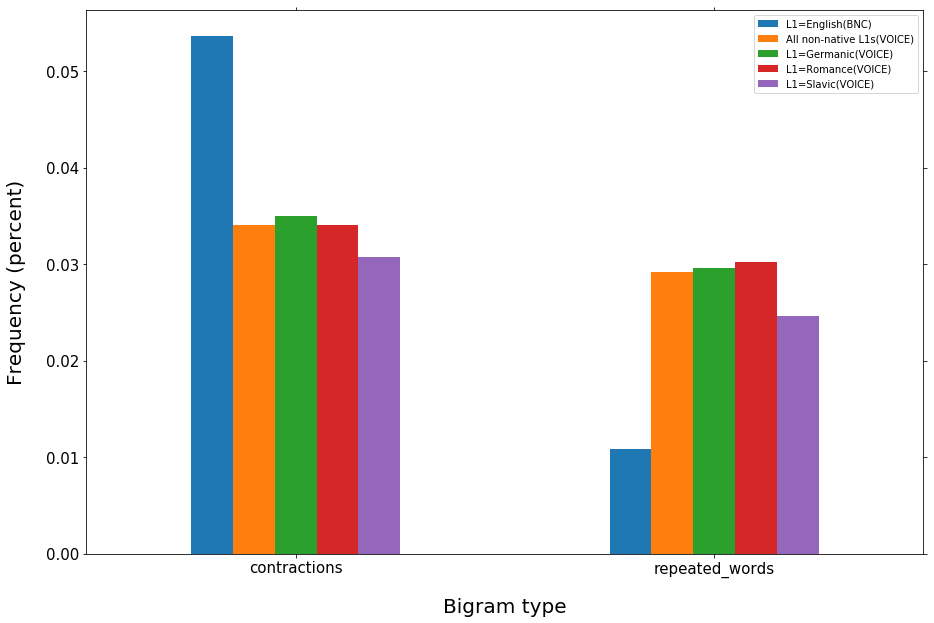

In [26]:
bigrams_df.plot(kind='bar', figsize=(15,10))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
bar_width = 0.4
L=plt.legend()
L.get_texts()[1].set_text('All non-native L1s(VOICE)')
plt.xlabel("Bigram type", fontsize= 20, labelpad = 20)
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()

## Modified Bigram Lists
Since the original VOICE bigram lists contain a lot of hesitations and repeated words, they are limited in what they can tell us about additional linguistic features. Here, we'll get rid of these bigrams to hopefully make some more interesting discoveries.

In [27]:
"""
Checks whether a given bigram in valid for our purposes. A bigram is valid if it doesn't contain repeated words
or hesitation words
"""
import re
def is_valid(bigram):
    if bigram[0] == bigram[1] :
        return False
    
    if bigram[0] == 'er' or bigram[1] == 'er' :
        return False
    
    if bigram[0] == 'erm' or bigram[1] == 'erm' :
        return False
    
   # return True
    
    
    p = re.compile('h+')
    if p.match(bigram[0]) or p.match(bigram[1]):
        return False
    
    p = re.compile('x+')
    if p.match(bigram[0]) or p.match(bigram[1]):
        return False
    
    #if(not bigram[0][0].isalpha() or not bigram[1][0].isalpha()):
    #if(bigram[0][0] == "]" or bigram[1][0] == "[")
    if("[" in bigram[0] or "[" in bigram[1] or "]" in bigram[0] or "]" in bigram[1]):
        return False
    

    return True


"\nChecks whether a given bigram in valid for our purposes. A bigram is valid if it doesn't contain repeated words\nor hesitation words\n"

In [28]:
#Remake the bigrams lists such that they only include valid bigrams
BNC_bigrams = [b for b in BNC_bigrams if is_valid(b) == True]
VOICE_bigrams = [b for b in VOICE_bigrams if is_valid(b) == True]
germanic_bigrams = [b for b in germanic_bigrams if is_valid(b) == True]
romance_bigrams = [b for b in romance_bigrams if is_valid(b) == True]
slavic_bigrams = [b for b in slavic_bigrams if is_valid(b) == True]

### Similarities between VOICE and BNC
More of the most frequent bigrams that occur in VOICE and the subcorpora also occur in BNC's most common bigrams than
with the unmodified bigrams. Like in the previous case, speakers of Germanic L1s had the most in common with the native
speakers in the BNC, and speakers of Slavic L1s had the least in common.

In [29]:
#For each corpus/subcorpus, get the top 20% of bigrams, in terms of frequency.
BNC_freq_bigrams = frequent_bigrams(BNC_bigrams, 0.2)
VOICE_freq_bigrams = frequent_bigrams(VOICE_bigrams, 0.2)
germanic_freq_bigrams = frequent_bigrams(germanic_bigrams, 0.2)
romance_freq_bigrams = frequent_bigrams(romance_bigrams, 0.2)
slavic_freq_bigrams = frequent_bigrams(slavic_bigrams, 0.2)

In [30]:
"""
For VOICE and each of its sub-corpora, create lists containing all of the top bigrams that occur in the corpus that 
also occur in BNC's top bigrams.
"""
VOICE_and_BNC = common_bigrams(BNC_freq_bigrams, VOICE_freq_bigrams)
germanic_and_BNC = common_bigrams(BNC_freq_bigrams, germanic_freq_bigrams)
romance_and_BNC = common_bigrams(BNC_freq_bigrams, romance_freq_bigrams)
slavic_and_BNC = common_bigrams(BNC_freq_bigrams, slavic_freq_bigrams)

"\nFor VOICE and each of its sub-corpora, create lists containing all of the top bigrams that occur in the corpus that \nalso occur in BNC's top bigrams.\n"

In [31]:
len(VOICE_and_BNC)/len(VOICE_freq_bigrams)
len(germanic_and_BNC)/len(germanic_freq_bigrams)
len(romance_and_BNC)/len(romance_freq_bigrams)
len(slavic_and_BNC)/len(slavic_freq_bigrams)

0.7959183673469388

0.7837837837837838

0.7698412698412699

0.7111111111111111

In [32]:
germanic_freq_bigrams

[(('it', "'s"), 3176),
 (('that', "'s"), 1653),
 (('i', 'think'), 1166),
 (('do', "n't"), 1093),
 (('in', 'the'), 1019),
 (('of', 'the'), 926),
 (('i', 'mean'), 719),
 (('i', "'m"), 701),
 (('you', 'know'), 699),
 (('this', 'is'), 681),
 (('and', 'then'), 651),
 (('if', 'you'), 632),
 (("'s", 'a'), 575),
 (('i', 'do'), 561),
 (('on', 'the'), 555),
 (('you', 'can'), 550),
 (('to', 'the'), 538),
 (('do', 'you'), 423),
 (('for', 'the'), 422),
 (('and', 'i'), 422),
 (('to', 'be'), 415),
 (('we', 'can'), 404),
 (('but', 'i'), 400),
 (('it', 'was'), 396),
 (('that', 'we'), 391),
 (('we', 'are'), 386),
 (('and', 'the'), 385),
 (('of', 'course'), 383),
 (("n't", 'know'), 381),
 (("'s", 'the'), 372),
 (('you', "'re"), 348),
 (('it', 'is'), 347),
 (('want', 'to'), 342),
 (("'s", 'not'), 342),
 (('sort', 'of'), 342),
 (("'s", 'it'), 341),
 (('at', 'the'), 340),
 (('and', 'you'), 312),
 (('the', 'same'), 311),
 (('with', 'the'), 308),
 (('is', 'the'), 306),
 (('kind', 'of'), 296),
 (('as', 'well')

In [33]:
romance_freq_bigrams

[(('it', "'s"), 953),
 (('do', "n't"), 438),
 (('in', 'the'), 380),
 (('i', 'think'), 366),
 (('that', "'s"), 301),
 (('of', 'the'), 297),
 (('you', 'know'), 287),
 (('i', "'m"), 265),
 (('this', 'is'), 243),
 (('i', 'do'), 241),
 (("n't", 'know'), 162),
 (('it', 'was'), 150),
 (('to', 'be'), 150),
 (('to', 'the'), 149),
 (('we', 'are'), 148),
 (('if', 'you'), 148),
 (("'s", 'a'), 148),
 (('and', 'then'), 147),
 (('on', 'the'), 141),
 (('it', 'is'), 138),
 (('and', 'i'), 138),
 (('we', 'can'), 137),
 (('i', 'mean'), 134),
 (('but', 'i'), 133),
 (('the', 'same'), 126),
 (("'s", 'not'), 122),
 (('you', 'can'), 120),
 (('that', 'we'), 116),
 (('all', 'the'), 112),
 (('is', 'the'), 110),
 (('and', 'the'), 107),
 (('is', 'a'), 107),
 (('yeah', 'but'), 106),
 (('think', 'that'), 106),
 (('for', 'the'), 104),
 (('is', 'not'), 102),
 (('in', 'this'), 100),
 (('at', 'the'), 99),
 (('did', "n't"), 97),
 (('to', 'do'), 97),
 (('but', 'it'), 96),
 (('there', 'is'), 93),
 (('kind', 'of'), 92),
 (('

In [34]:
slavic_freq_bigrams

[(('it', "'s"), 567),
 (('do', "n't"), 248),
 (('i', 'think'), 235),
 (('that', "'s"), 196),
 (('of', 'the'), 189),
 (('this', 'is'), 187),
 (('i', 'mean'), 176),
 (('in', 'the'), 164),
 (('i', "'m"), 150),
 (('i', 'do'), 149),
 (('on', 'the'), 122),
 (('you', 'know'), 116),
 (('and', 'then'), 112),
 (('we', 'can'), 111),
 (('think', 'that'), 108),
 (('it', 'was'), 108),
 (('is', 'the'), 107),
 (('will', 'be'), 104),
 (('with', 'the'), 101),
 (('it', 'is'), 95),
 (('we', 'are'), 92),
 (('and', 'i'), 91),
 (('for', 'the'), 91),
 (("n't", 'know'), 87),
 (('that', 'we'), 84),
 (('if', 'you'), 83),
 (('do', 'you'), 77),
 (('the', 'same'), 76),
 (('you', 'can'), 74),
 (('to', 'be'), 73),
 (('at', 'the'), 73),
 (('but', 'it'), 71),
 (("'s", 'not'), 71),
 (('there', 'is'), 71),
 (('let', "'s"), 70),
 (('about', 'the'), 67),
 (('we', 'should'), 66),
 (('and', 'the'), 65),
 (('so', 'i'), 65),
 (('but', 'i'), 64),
 (('i', 'would'), 64),
 (('going', 'to'), 63),
 (('i', 'can'), 62),
 (('is', 'a'),

## Differences between VOICE and BNC

In [35]:
VOICE_not_BNC = [b[0] for b in VOICE_freq_bigrams if b[0] not in VOICE_and_BNC]
BNC_not_VOICE = BNC_not_VOICE = [b[0] for b in BNC_freq_bigrams if b[0] not in VOICE_and_BNC]

In [36]:
VOICE_not_BNC

[('we', 'are'),
 ('kind', 'of'),
 ('they', 'are'),
 ('is', 'not'),
 ('for', 'example'),
 ('so', 'it'),
 ('yeah', 'but'),
 ('you', 'are'),
 ('should', 'be'),
 ('so', 'we'),
 ('we', 'will'),
 ('let', "'s"),
 ('and', 'this'),
 ('because', 'i'),
 ('what', 'is'),
 ('then', 'we'),
 ('in', 'this'),
 ('we', 'should'),
 ('and', 'so'),
 ('to', 'make'),
 ('but', 'we'),
 ('because', 'it'),
 ('i', 'will'),
 ('part', 'of'),
 ('at', 'least'),
 ('then', 'you'),
 ("'s", 'very'),
 ('because', 'we'),
 ('could', 'be'),
 ('are', 'not')]

In [37]:
BNC_not_VOICE

[("'ve", 'got'),
 ('you', "'ve"),
 ('we', "'ve"),
 ('well', 'i'),
 ('she', "'s"),
 ("n't", 'it'),
 ('is', "n't"),
 ('used', 'to'),
 ('what', "'s"),
 ('i', 'said'),
 ('a', 'bit'),
 ('you', 'see'),
 ('got', 'a'),
 ('one', 'of'),
 ('was', 'a'),
 ("n't", 'you'),
 ('they', 'were'),
 ('there', 'was'),
 ('got', 'to'),
 ('i', "'d"),
 ('are', 'you'),
 ('for', 'a'),
 ('did', 'you'),
 ('would', "n't"),
 ('they', "'ve"),
 ("'s", 'got'),
 ('we', "'ll"),
 ('wo', "n't"),
 ("'s", 'right'),
 ('what', 'you'),
 ('i', 'thought'),
 ('of', 'a'),
 ('out', 'of'),
 ('look', 'at'),
 ('was', "n't"),
 ('oh', 'i'),
 ("n't", 'think'),
 ("'re", 'not'),
 ("'ll", 'be'),
 ('if', 'i'),
 ('you', 'get'),
 ('by', 'the'),
 ('when', 'i'),
 ('of', 'them'),
 ("'m", 'not'),
 ('know', 'what'),
 ("'s", 'what'),
 ('and', 'a'),
 ('of', 'it'),
 ('i', 'ca'),
 ('that', 'one'),
 ('you', "'ll"),
 ('the', 'way'),
 ('you', 'could'),
 ('on', 'a'),
 ('was', 'the'),
 ('you', 'got'),
 ('she', 'said'),
 ('with', 'a'),
 ('could', "n't"),
 ('som

# Comparing Contraction Use


### Proportion of contraction bigrams
As noted in the bigram comparison, contractions appeared frequently among the BNC's most common bigrams, while they
were much less common among VOICE's bigrams. Even after hesitation bigrams were removed from the bigram lists (which most likely impacted VOICE more than BNC), the proportion of contractions in the BNC is significantly higher than those in VOICE and the three sub-corpora. This time, speakers of Romance L1s had the highest proportion of contraction use among non-native speakers, at 0.01.

In [38]:
BNC_contractions_proportions = len([b for b in BNC_bigrams if "'" in b[1]])/len(BNC_bigrams)
BNC_contractions_proportions

0.056755461989655594

In [39]:
VOICE_contractions_proportions = len([b for b in VOICE_bigrams if "'" in b[1]])/len(VOICE_bigrams)
VOICE_contractions_proportions

0.04213875886707224

In [40]:
germanic_contractions_proportions = len([b for b in germanic_bigrams if "'" in b[1]])/len(germanic_bigrams)
germanic_contractions_proportions

0.04331497802251526

In [41]:
romance_contractions_proportions = len([b for b in romance_bigrams if "'" in b[1]])/len(romance_bigrams)
romance_contractions_proportions

0.042036899913612244

In [42]:
slavic_contractions_proportions = len([b for b in slavic_bigrams if "'" in b[1]])/len(slavic_bigrams)
slavic_contractions_proportions

0.0379743920412675

In [43]:
#[b for b in romance_bigrams if "'" in b[1]]
[b for b in germanic_bigrams if "'" in b[1]]

[('it', "'s"),
 ('you', "'ll"),
 ('you', "'ll"),
 ('does', "n't"),
 ('that', "'s"),
 ('it', "'s"),
 ('it', "'s"),
 ('it', "'s"),
 ('we', "'re"),
 ('it', "'s"),
 ('that', "'s"),
 ('that', "'s"),
 ('you', "'re"),
 ('i', "'m"),
 ('we', "'re"),
 ('i', "'m"),
 ('i', "'m"),
 ('we', "'ll"),
 ('did', "n't"),
 ('it', "'s"),
 ('that', "'s"),
 ('that', "'s"),
 ('you', "'re"),
 ('it', "'s"),
 ('ca', "n't"),
 ('that', "'s"),
 ('we', "'re"),
 ('we', "'re"),
 ('that', "'s"),
 ('do', "n't"),
 ('that', "'s"),
 ('that', "'s"),
 ('it', "'d"),
 ('were', "n't"),
 ('it', "'s"),
 ('it', "'s"),
 ('you', "'d"),
 ('it', "'s"),
 ('we', "'re"),
 ('we', "'re"),
 ('it', "'s"),
 ('you', "'re"),
 ('do', "n't"),
 ('that', "'s"),
 ('that', "'s"),
 ('i', "'m"),
 ('it', "'s"),
 ('do', "n't"),
 ('do', "n't"),
 ('we', "'re"),
 ('do', "n't"),
 ('that', "'s"),
 ('it', "'s"),
 ('i', "'ve"),
 ('we', "'re"),
 ('it', "'s"),
 ('we', "'re"),
 ('it', "'s"),
 ('it', "'s"),
 ('that', "'s"),
 ('we', "'re"),
 ('ca', "n't"),
 ('we', "'r

### Common contraction bigrams in each corpus
Clearly, contractions occur much more frequently among the BNC's most common bigrams than among VOICE's bigrams. The contractions found in the most common bigrams of VOICE's sub-corpora seem pretty uniform (don't, can't, doesn't, didn't, 'nt know). Also, these bigrams seem to be the most frequent contractions used in the BNC. This could indicate that non-native speakers can confidently use the most commonly-occurring contractions in English, but might struggle to use them in other contexts.

In [44]:
#BNC_common_contractions = [b for b in BNC_freq_bigrams if "'" in b[0][0] or "'" in b[0][1]]
BNC_common_contractions = [b for b in BNC_freq_bigrams if "'" in b[0][1]]
BNC_common_contractions

[(('it', "'s"), 68661),
 (('that', "'s"), 45150),
 (('do', "n't"), 42215),
 (('i', "'m"), 25963),
 (('i', "'ve"), 18154),
 (('you', "'re"), 17641),
 (('there', "'s"), 16983),
 (('they', "'re"), 15291),
 (('did', "n't"), 14026),
 (('you', "'ve"), 13023),
 (('ca', "n't"), 12895),
 (('i', "'ll"), 12743),
 (('we', "'re"), 10764),
 (('we', "'ve"), 10572),
 (('she', "'s"), 8907),
 (('is', "n't"), 8439),
 (('what', "'s"), 8014),
 (('does', "n't"), 6927),
 (('i', "'d"), 6199),
 (('would', "n't"), 5884),
 (('they', "'ve"), 5852),
 (('we', "'ll"), 5749),
 (('wo', "n't"), 5714),
 (('was', "n't"), 5174),
 (('you', "'ll"), 4178),
 (('could', "n't"), 3949)]

In [45]:
#VOICE_common_contractions = [b for b in VOICE_freq_bigrams if "'" in b[0][0] or "'" in b[0][1]]
VOICE_common_contractions = [b for b in VOICE_freq_bigrams if "'" in b[0][1]]
VOICE_common_contractions

[(('it', "'s"), 5976),
 (('that', "'s"), 2637),
 (('do', "n't"), 2339),
 (('i', "'m"), 1454),
 (('you', "'re"), 541),
 (('did', "n't"), 455),
 (('there', "'s"), 414),
 (('we', "'re"), 401),
 (('let', "'s"), 355),
 (('ca', "n't"), 344),
 (('they', "'re"), 308),
 (('does', "n't"), 293),
 (('i', "'ll"), 246),
 (('i', "'ve"), 244)]

In [46]:
#germanic_common_contractions = [b for b in germanic_freq_bigrams if "'" in b[0][0] or "'" in b[0][1]]
germanic_common_contractions = [b for b in germanic_freq_bigrams if "'" in b[0][1]]
germanic_common_contractions

[(('it', "'s"), 3176),
 (('that', "'s"), 1653),
 (('do', "n't"), 1093),
 (('i', "'m"), 701),
 (('you', "'re"), 348),
 (('there', "'s"), 258),
 (('we', "'re"), 241),
 (('did', "n't"), 210),
 (('ca', "n't"), 177),
 (('let', "'s"), 163),
 (('they', "'re"), 162),
 (('i', "'ve"), 156),
 (('does', "n't"), 135),
 (('i', "'ll"), 132)]

In [47]:
#romance_common_contractions = [b for b in romance_freq_bigrams if "'" in b[0][0] or "'" in b[0][1]]
romance_common_contractions = [b for b in romance_freq_bigrams if "'" in b[0][1]]
romance_common_contractions

[(('it', "'s"), 953),
 (('do', "n't"), 438),
 (('that', "'s"), 301),
 (('i', "'m"), 265),
 (('did', "n't"), 97),
 (('you', "'re"), 72),
 (('ca', "n't"), 60),
 (('let', "'s"), 57),
 (('we', "'re"), 54),
 (('does', "n't"), 46)]

In [48]:
#slavic_common_contractions = [b for b in slavic_freq_bigrams if "'" in b[0][0] or "'" in b[0][1]]
slavic_common_contractions = [b for b in slavic_freq_bigrams if "'" in b[0][1]]
slavic_common_contractions

[(('it', "'s"), 567),
 (('do', "n't"), 248),
 (('that', "'s"), 196),
 (('i', "'m"), 150),
 (('let', "'s"), 70),
 (('did', "n't"), 44),
 (('you', "'re"), 35),
 (('does', "n't"), 31),
 (('ca', "n't"), 31),
 (('we', "'re"), 28)]

In [49]:
VOICE_not_BNC = uncommon_bigrams(BNC_freq_bigrams, VOICE_freq_bigrams)
len(VOICE_not_BNC)

30

In [50]:
#contractions = [b for b in BNC_not_VOICE if "'" in b[0] or "'" in b[1]]
contractions = [b for b in BNC_not_VOICE if "'" in b[1]]

In [51]:
#Close to 20% of the common BNC bigrams not found in the common VOICE bigrams are contractions. Is this true for the sub groups, too?
len(contractions)
len(contractions)/len(BNC_not_VOICE)
contractions

13

0.17105263157894737

[('you', "'ve"),
 ('we', "'ve"),
 ('she', "'s"),
 ('is', "n't"),
 ('what', "'s"),
 ('i', "'d"),
 ('would', "n't"),
 ('they', "'ve"),
 ('we', "'ll"),
 ('wo', "n't"),
 ('was', "n't"),
 ('you', "'ll"),
 ('could', "n't")]

In [52]:
#contractions = [b for b in BNC_not_germanic if "'" in b[0] or "'" in b[1]]
contractions = [b for b in BNC_not_germanic if "'" in b[1]]
len(contractions)
len(contractions)/len(BNC_not_germanic)
contractions

18

0.15384615384615385

[('he', "'s"),
 ('you', "'ve"),
 ('i', "'ll"),
 ('we', "'ve"),
 ('she', "'s"),
 ('is', "n't"),
 ('what', "'s"),
 ('have', "n't"),
 ('does', "n't"),
 ('i', "'d"),
 ('would', "n't"),
 ('they', "'ve"),
 ('we', "'ll"),
 ('wo', "n't"),
 ('was', "n't"),
 ('you', "'ll"),
 ('could', "n't"),
 ('you', "'d")]

In [53]:
#contractions = [b for b in BNC_not_romance if "'" in b[0] or "'" in b[1]]
contractions = [b for b in BNC_not_romance if "'" in b[1]]
len(contractions)
len(contractions)/len(BNC_not_romance)
contractions

21

0.1510791366906475

[('i', "'ve"),
 ('there', "'s"),
 ('they', "'re"),
 ('he', "'s"),
 ('you', "'ve"),
 ('i', "'ll"),
 ('we', "'ve"),
 ('she', "'s"),
 ('is', "n't"),
 ('what', "'s"),
 ('have', "n't"),
 ('does', "n't"),
 ('i', "'d"),
 ('would', "n't"),
 ('they', "'ve"),
 ('we', "'ll"),
 ('wo', "n't"),
 ('was', "n't"),
 ('you', "'ll"),
 ('could', "n't"),
 ('you', "'d")]

In [54]:
#contractions = [b for b in BNC_not_slavic if "'" in b[0] or "'" in b[1]]
contractions = [b for b in BNC_not_slavic if "'" in b[1]]
len(contractions)
len(contractions)/len(BNC_not_slavic)
contractions

21

0.16030534351145037

[('i', "'ve"),
 ('there', "'s"),
 ('they', "'re"),
 ('he', "'s"),
 ('you', "'ve"),
 ('i', "'ll"),
 ('we', "'re"),
 ('we', "'ve"),
 ('she', "'s"),
 ('is', "n't"),
 ('what', "'s"),
 ('have', "n't"),
 ('i', "'d"),
 ('would', "n't"),
 ('they', "'ve"),
 ('we', "'ll"),
 ('wo', "n't"),
 ('was', "n't"),
 ('you', "'ll"),
 ('could', "n't"),
 ('you', "'d")]

In [55]:
BNC_contractions = [b for b in BNC_bigrams if "'" in b[1]]

In [56]:
germanic_contractions = [b for b in germanic_bigrams if "'" in b[1]]

In [57]:
romance_contractions = [b for b in romance_bigrams if "'" in b[1]]

In [58]:
slavic_contractions = [b for b in slavic_bigrams if "'" in b[1]]

In [59]:
BNC_contractions_frequencies = nltk.FreqDist(BNC_contractions)

In [60]:
germanic_contractions_frequencies = nltk.FreqDist(germanic_contractions)

In [61]:
romance_contractions_frequencies = nltk.FreqDist(romance_contractions)

In [62]:
slavic_contractions_frequencies = nltk.FreqDist(slavic_contractions)

In [63]:
contractions_df = pd.DataFrame(index = [b[0] for b in BNC_common_contractions[:15]], columns = ['English(BNC)', 'Germanic(VOICE)', 'Romance(VOICE)', 'Slavic(VOICE)'])

In [64]:
for bigram in BNC_common_contractions[:15]:
    bigram = bigram[0]
    contractions_df['English(BNC)'][bigram] = BNC_contractions_frequencies[bigram]/len(BNC_bigrams)
    contractions_df['Germanic(VOICE)'][bigram] = germanic_contractions_frequencies[bigram]/len(germanic_bigrams)
    contractions_df['Romance(VOICE)'][bigram] = romance_contractions_frequencies[bigram]/len(romance_bigrams)
    contractions_df['Slavic(VOICE)'][bigram] = slavic_contractions_frequencies[bigram]/len(slavic_bigrams)

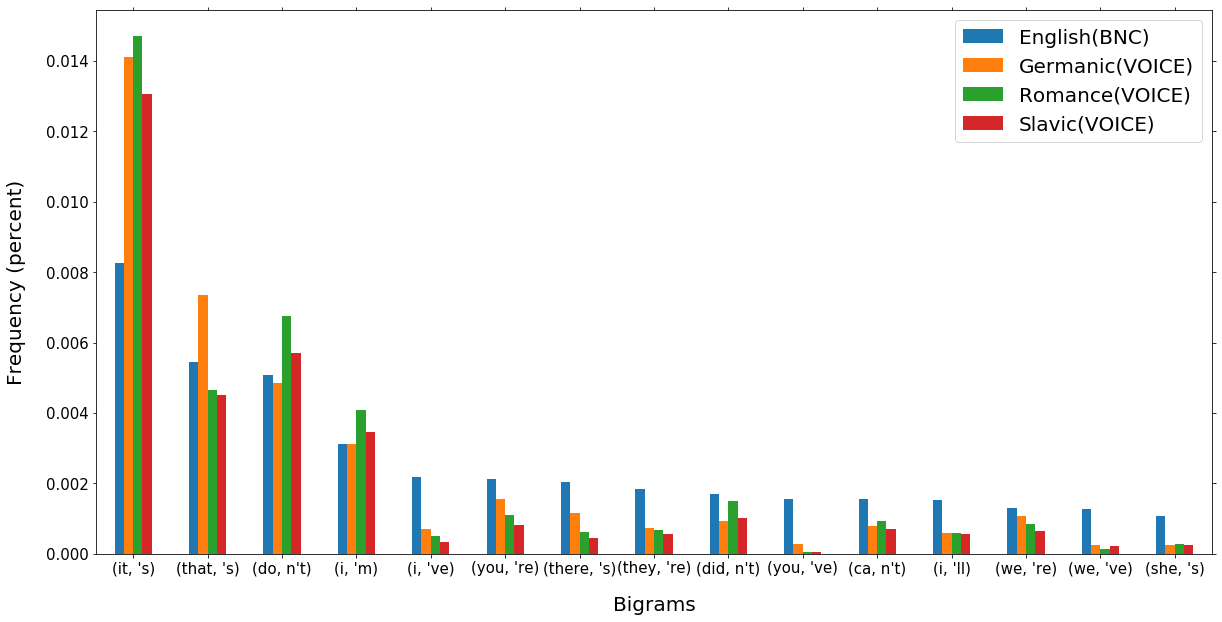

In [65]:
contractions_df.plot(kind='bar', figsize=(20,10))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
plt.xlabel("Bigrams", fontsize= 20, labelpad = 20)
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()

In [66]:
BNC_contractions_frequencies[('why', "'re")]

3

In [93]:
for b in BNC_contractions_frequencies.keys():
    if b[0] == "'tis":
    #if b[0] == "'twas":
        print(b)

("'tis", "n't")


In [68]:
BNC_contractions_frequencies[('mustn', "'t")]

0

In [89]:
BNC_contractions_frequencies[('sha', "n't")]

148

In [69]:
BNC_contractions_frequencies[('ca', "n't")]

12895

In [70]:
BNC_contractions_frequencies[('ai', "n't")]

2281

In [71]:
germanic_contractions_frequencies[('ai', "n't")]

8

In [72]:
romance_contractions_frequencies[('ai', "n't")]

1

In [73]:
BNC_contractions_frequencies[('sha', "n't")]

148

In [86]:
BNC_contractions_frequencies[("'tis", "the")]

0

In [74]:
len(participants.keys())

1253

In [99]:
[b for b in BNC_bigrams if b[0] == "y'all"]

[]

# Additional stuff(For presentation)

In [75]:
BNC_bigrams = [b for b in BNC_bigrams if b not in BNC_contractions_frequencies.keys()]
BNC_bigrams = [b for b in BNC_bigrams if "'" not in b[0]]
BNC_freq_bigrams = frequent_bigrams(BNC_bigrams, .2)
BNC_freq_bigrams = nltk.FreqDist(BNC_bigrams)

In [76]:
germanic_bigrams = [b for b in germanic_bigrams if b not in germanic_contractions_frequencies.keys()]
germanic_bigrams = [b for b in germanic_bigrams if "'" not in b[0]]
germanic_freq_bigrams = frequent_bigrams(germanic_bigrams, .2)
germanic_freq_bigrams = nltk.FreqDist(germanic_bigrams)

In [77]:
romance_bigrams = [b for b in romance_bigrams if b not in romance_contractions_frequencies.keys()]
romance_bigrams = [b for b in romance_bigrams if "'" not in b[0]]
romance_freq_bigrams = frequent_bigrams(romance_bigrams, .2)
romance_freq_bigrams = nltk.FreqDist(romance_bigrams)

In [78]:
slavic_bigrams = [b for b in slavic_bigrams if b not in slavic_contractions_frequencies.keys()]
slavic_bigrams = [b for b in slavic_bigrams if "'" not in b[0]]
slavic_freq_bigrams = frequent_bigrams(slavic_bigrams, .2)
slavic_freq_bigrams = nltk.FreqDist(slavic_bigrams)

In [79]:
BNC_top_20 = BNC_freq_bigrams.most_common(20)
BNC_top_20 = [b[0] for b in BNC_top_20]

In [80]:
bigrams_df = pd.DataFrame(index = BNC_top_20, columns = ['English(BNC)', 'Germanic(VOICE)', 'Romance(VOICE)', 'Slavic(VOICE)'])

In [81]:
for bigram in BNC_top_20:
    bigrams_df['English(BNC)'][bigram] = BNC_freq_bigrams[bigram]/len(BNC_bigrams)
    bigrams_df['Germanic(VOICE)'][bigram] = germanic_freq_bigrams[bigram]/len(germanic_bigrams)
    bigrams_df['Romance(VOICE)'][bigram] = romance_freq_bigrams[bigram]/len(romance_bigrams)
    bigrams_df['Slavic(VOICE)'][bigram] = slavic_freq_bigrams[bigram]/len(slavic_bigrams)

In [82]:
bigrams_df

,English(BNC),Germanic(VOICE),Romance(VOICE),Slavic(VOICE)
"(in, the)",0.00480445,0.00493592,0.00637274,0.00407019
"(of, the)",0.00471456,0.00448543,0.0049808,0.00469064
"(you, know)",0.00418012,0.00338587,0.00481309,0.00287891
"(i, think)",0.00350413,0.00564797,0.00613795,0.00583228
"(i, do)",0.00292399,0.00271742,0.00404166,0.00369791
"(on, the)",0.00278937,0.00268835,0.00236462,0.00302782
"(and, i)",0.00276808,0.00204412,0.00231431,0.00225846
"(i, mean)",0.00276117,0.00348275,0.00224723,0.004368
"(it, was)",0.00257678,0.00191818,0.00251555,0.00268037
"(if, you)",0.00236989,0.00306133,0.00248201,0.00205991


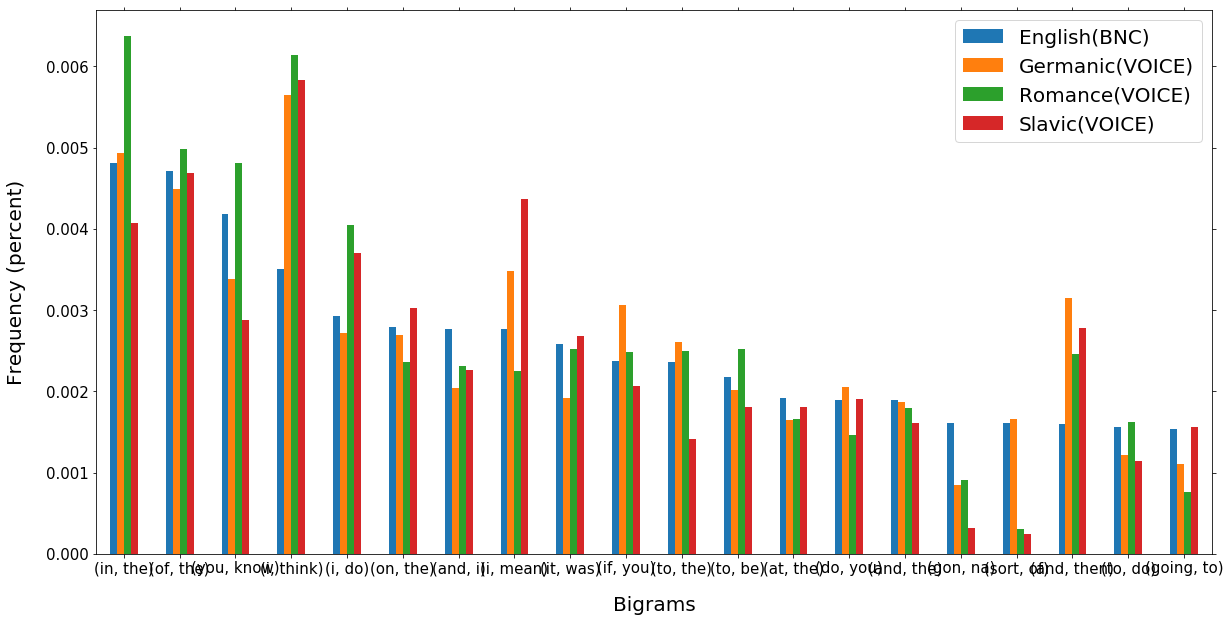

In [83]:
bigrams_df.plot(kind='bar', figsize=(20,10))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
plt.xlabel("Bigrams", fontsize= 20, labelpad = 20)
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()